In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
df = pd.read_csv('bank_loan.csv', na_values='?')

In [19]:
bl_10y = df[df['Years in current job'] == 10]
final_dataset = bl_10y[bl_10y['Purpose'] == 'Debt Consolidation']

In [20]:
#final_dataset = final_dataset.reset_index()
#final_dataset = final_dataset.drop(columns=['level_0','index'])
final_dataset

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,6fa72edc-ed0c-4734-8706-3061c0e55643,47c8dada-4559-4914-9336-229f9f5291c7,775236,Long Term,714,7651680,10,Home Mortgage,Debt Consolidation,91820.16,23.0,8,20,0,649192,2363812,0,0
10,3e0555a6-41f2-473e-981a-9f6786f791f3,53801d9d-d359-472c-a443-2b8d592b2ea1,53196,Short Term,722,3828120,10,Home Mortgage,Debt Consolidation,52955.66,13.4,75,10,0,407227,543246,0,0
19,198f88f6-6b01-474d-b28f-21c65b7a25c0,cc18ba24-1c44-44b5-815e-772bae5b2983,768086,Short Term,718,3508483,10,Home Mortgage,Debt Consolidation,16431.39,23.7,18,16,0,796670,1677192,0,0
23,286f9409-497d-46aa-915c-1a524d68fb91,b4b57048-2006-4702-94ed-be3d7ca25411,258016,Short Term,725,3416637,10,Rent,Debt Consolidation,13267.89,27.6,15,11,0,230299,398024,0,0
27,e742911d-d15d-47ee-8e24-fa9140a8289e,d0b567a3-5483-4ba4-b6d0-2bf148458ce3,442728,Short Term,735,3250026,10,Home Mortgage,Debt Consolidation,16791.82,21.6,79,15,0,196175,780560,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,d5369d42-23c2-47b0-8d29-a5b05f126e6a,c7efbfff-b75f-4c37-9eca-aeb8c69926bb,72732,Short Term,731,541101,10,Home Mortgage,Debt Consolidation,8161.45,14.9,32,10,0,209456,273130,0,0
970,a000f85a-f329-4d82-90b1-5b211527642a,222f5fa2-4172-481a-959c-dc43df97a446,162338,Short Term,739,523431,10,Own Home,Debt Consolidation,9770.94,24.2,67,8,0,307648,675950,0,0
974,7ab369a6-482d-4d8f-99db-eb4d5b3a86ca,7b403915-ec26-4a28-a9d3-e1e471c1fca7,80190,Short Term,693,493316,10,Rent,Debt Consolidation,15703.69,13.0,40,11,0,114779,214324,0,0
977,e19489df-2f04-4c6d-a58c-93538a0b67ec,efe43d03-0019-4353-80ca-8c35e6a57055,222310,Short Term,727,481175,10,Rent,Debt Consolidation,6014.64,17.4,30,8,0,89699,133650,0,0


In [21]:
final_dataset = final_dataset.rename(columns={'Term': 'target'})
final_dataset['target'].value_counts(dropna=False)

Short Term    187
Long Term     102
Name: target, dtype: int64

In [22]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 1 to 998
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       289 non-null    object 
 1   Customer ID                   289 non-null    object 
 2   Current Loan Amount           289 non-null    int64  
 3   target                        289 non-null    object 
 4   Credit Score                  289 non-null    int64  
 5   Annual Income                 289 non-null    int64  
 6   Years in current job          289 non-null    int64  
 7   Home Ownership                289 non-null    object 
 8   Purpose                       289 non-null    object 
 9   Monthly Debt                  289 non-null    float64
 10  Years of Credit History       289 non-null    float64
 11  Months since last delinquent  289 non-null    int64  
 12  Number of Open Accounts       289 non-null    int64  
 13  Numbe

In [23]:
loan_amount = final_dataset.filter(['Current Loan Amount', 'Monthly Debt'])

In [13]:
loan_amount

,Current Loan Amount,Monthly Debt
1,775236,91820.16
10,53196,52955.66
19,768086,16431.39
23,258016,13267.89
27,442728,16791.82
...,...,...
965,72732,8161.45
970,162338,9770.94
974,80190,15703.69
977,222310,6014.64


In [24]:
loan_amount

,Current Loan Amount,Monthly Debt
1,775236,91820.16
10,53196,52955.66
19,768086,16431.39
23,258016,13267.89
27,442728,16791.82
...,...,...
965,72732,8161.45
970,162338,9770.94
974,80190,15703.69
977,222310,6014.64


In [25]:
final_dataset['target'][final_dataset['target'] == 'Short Term'] = 0
final_dataset['target'][final_dataset['target'] == 'Long Term'] = 1

<ipython-input-25-22117633401c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['target'][final_dataset['target'] == 'Short Term'] = 0
<ipython-input-25-22117633401c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['target'][final_dataset['target'] == 'Long Term'] = 1


In [26]:
final_dataset['target'].value_counts(dropna=False)

0    187
1    102
Name: target, dtype: int64

In [28]:
X = final_dataset[['Current Loan Amount', 'Monthly Debt']]
X

,Current Loan Amount,Monthly Debt
1,775236,91820.16
10,53196,52955.66
19,768086,16431.39
23,258016,13267.89
27,442728,16791.82
...,...,...
965,72732,8161.45
970,162338,9770.94
974,80190,15703.69
977,222310,6014.64


In [34]:
y= final_dataset.target
y=y.astype('int64')
y


1      1
10     0
19     0
23     0
27     0
      ..
965    0
970    0
974    0
977    0
998    0
Name: target, Length: 289, dtype: int64

In [129]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=2)

In [130]:
X_test

,Current Loan Amount,Monthly Debt
34,621236,54945.53
500,374176,26777.46
385,447216,14725.19
387,222618,3652.94
659,161194,14632.28
...,...,...
664,220704,12989.54
250,312862,36210.58
405,377960,17524.46
831,265188,8750.64


In [131]:
y_train.value_counts(dropna=False)

0    70
1    45
Name: target, dtype: int64

In [132]:
#Fitting the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [133]:
#Prediction of test set
y_pred = lr_model.predict(X_test)
#Predicted values
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [134]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a

,Actual value,Predicted value
34,1,0
500,1,0
385,1,1
387,0,1
659,0,0
...,...,...
664,0,0
250,0,0
405,0,1
831,0,1


              precision    recall  f1-score   support

           0       0.78      0.62      0.69       117
           1       0.45      0.63      0.53        57

    accuracy                           0.63       174
   macro avg       0.61      0.63      0.61       174
weighted avg       0.67      0.63      0.64       174



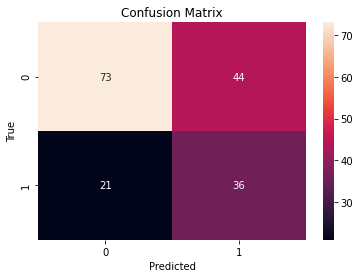

In [135]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

In [152]:
#Out of the 58 False Values of Target, 32 were predicted correctly.
#No values were predicted for True values

In [158]:
"""
Looking at the confusion matrix, if the predicted results are correct, this could be due to the imbalanced data provided.
Also, I'm thinking that something might be wrong during the preparation of the dependent and independent variables which
could have caused prediction to return all zeros.

However, assuming that the data are predicted correctly, 55% serves as the accuracy of the model for this prediction.
In terms of precision, we got 55% precision in terms of predicting correct values of 0 only. 
As for the recall, we can see that it got 100% since the predicted results were all 0 values. 
This means that the model can predict 100% of the relevant data.

For the values of 0, the f1-score obtained is 71%. This is basically the average of precision and recall.


Also in addition to this classification report, as for the background of these variables chosen,
when it comes to their correlation, they are only approximately 43% correlated.



"""